In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
! pip install missingno
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import missingno as msno
%matplotlib inline

In [3]:
df = pd.read_csv('/content/drive/MyDrive/HTML final project/all_train(with_churnCategory_NaN).csv',index_col=0)
df_no_useless_column = df.copy()
df_no_useless_column.drop(['State', 'ID', 'Country','Count', 'Customer ID','Quarter'], axis=1, inplace=True)

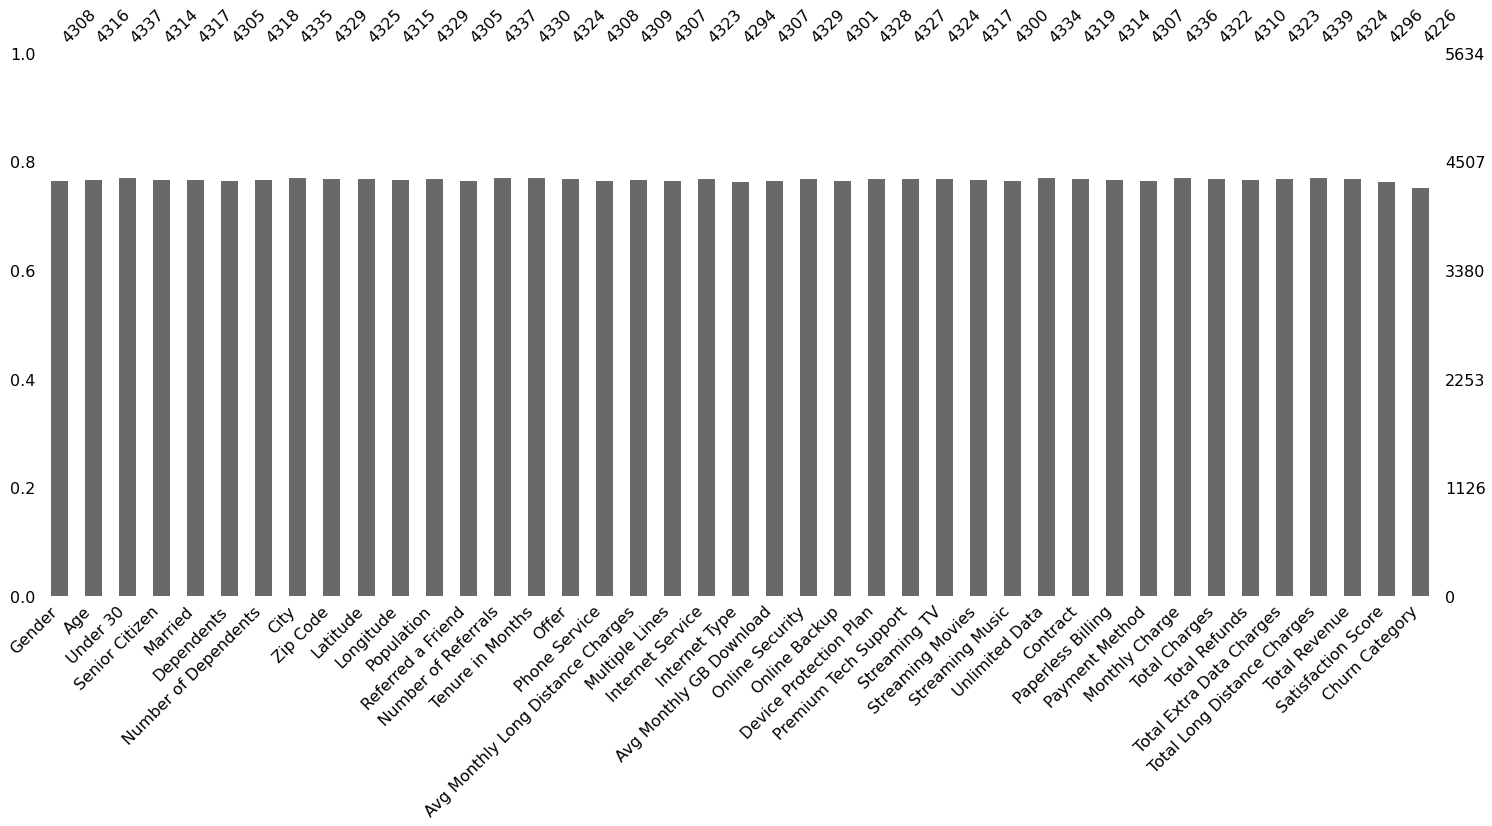

In [4]:
msno.bar(df_no_useless_column)

In [19]:
df_no_useless_column = df_no_useless_column.dropna(subset=['Churn Category'])

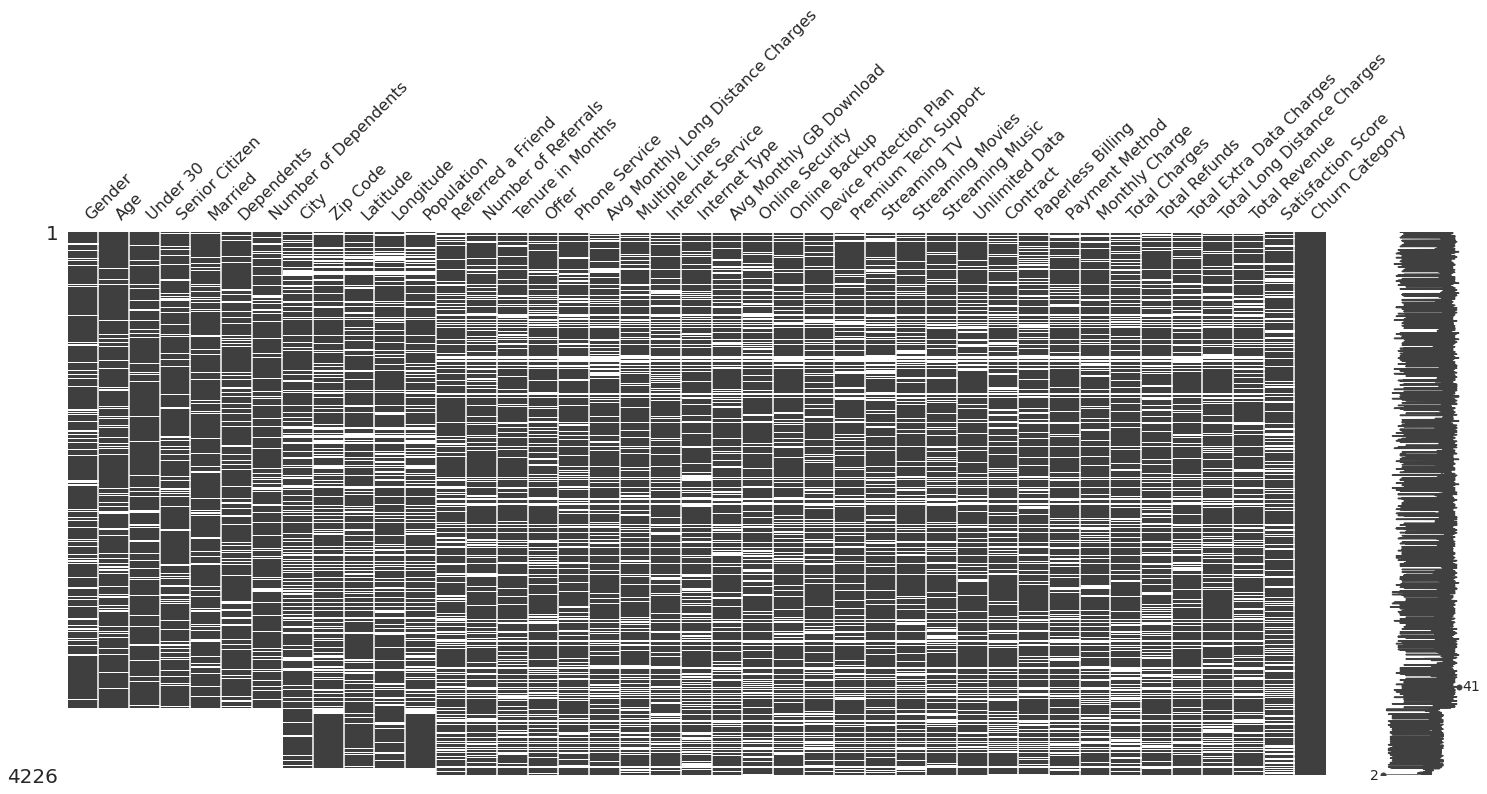

In [20]:
msno.matrix(df_no_useless_column)

### msno heatmap
- A value near -1 means if one variable appears then the other variable is very likely to be missing.
- A value near 0 means there is no dependence between the occurrence of missing values of two variables.
- A value near 1 means if one variable appears then the other variable is very likely to be present.

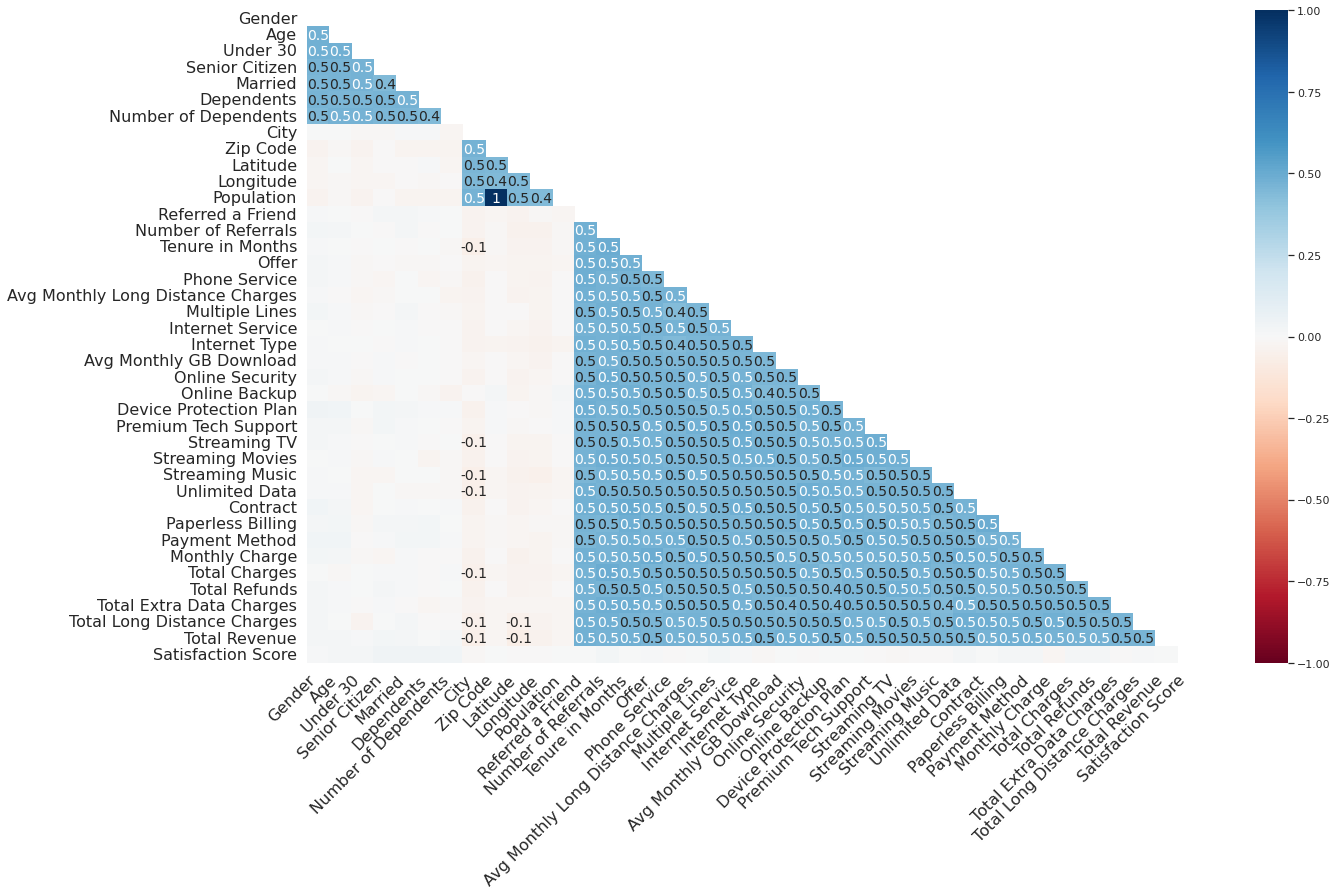

In [22]:
msno.heatmap(df_no_useless_column)

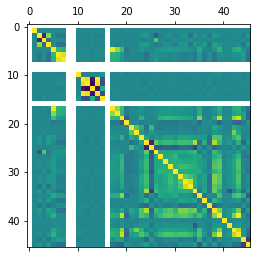

In [7]:
import matplotlib.pyplot as plt

plt.matshow(df.corr())
plt.show()

In [8]:
import numpy as np
corr = df_no_useless_column.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,City,Zip Code,Latitude,Longitude,Population,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Churn Category
Gender,1.00,-0.01,0.01,-0.00,0.01,-0.00,-0.00,0.01,0.02,-0.00,-0.01,0.01,0.00,-0.01,-0.01,0.02,-0.00,0.02,-0.01,0.02,0.01,0.00,-0.01,-0.02,0.00,-0.02,0.01,-0.00,0.01,0.01,-0.03,-0.01,0.02,0.01,-0.00,0.01,0.00,0.00,0.00,-0.01,-0.01
Age,-0.01,1.00,-0.67,0.69,0.00,-0.13,-0.11,-0.00,-0.02,-0.02,0.03,-0.04,-0.01,-0.03,0.02,-0.01,0.01,-0.02,0.11,0.14,-0.02,-0.37,-0.04,0.06,0.04,-0.05,0.06,0.09,-0.15,0.12,0.02,0.10,-0.11,0.15,0.07,0.02,-0.00,0.01,0.05,-0.08,0.11
Under 30,0.01,-0.67,1.00,-0.22,0.02,0.04,0.03,0.00,-0.01,-0.00,-0.00,0.05,0.04,0.01,-0.01,-0.00,-0.02,0.02,-0.03,-0.05,-0.01,0.51,0.03,-0.02,-0.01,0.04,-0.01,-0.02,0.11,-0.04,-0.00,-0.03,0.04,-0.05,-0.03,-0.01,0.02,0.00,-0.02,0.05,-0.06
Senior Citizen,-0.00,0.69,-0.22,1.00,0.02,-0.17,-0.17,-0.01,-0.00,-0.02,0.03,-0.02,0.00,-0.04,0.02,-0.03,0.01,-0.02,0.15,0.18,-0.01,-0.10,-0.05,0.08,0.06,-0.07,0.10,0.11,-0.15,0.14,0.03,0.15,-0.14,0.21,0.10,0.02,0.02,0.00,0.08,-0.13,0.13
Married,0.01,0.00,0.02,0.02,1.00,0.36,0.32,0.00,0.01,-0.01,-0.01,0.01,0.96,0.67,0.39,-0.13,-0.01,-0.00,0.13,0.01,0.00,0.08,0.12,0.14,0.16,0.12,0.14,0.11,0.09,0.01,0.28,-0.00,-0.04,0.09,0.32,0.04,0.03,0.26,0.33,0.07,-0.12
Dependents,-0.00,-0.13,0.04,-0.17,0.36,1.00,0.89,-0.01,0.03,0.04,-0.03,0.00,0.33,0.29,0.15,-0.07,-0.01,-0.00,-0.03,-0.15,0.05,0.10,0.06,0.02,-0.01,0.05,-0.04,-0.07,-0.03,-0.13,0.17,-0.12,0.08,-0.13,0.06,0.04,0.01,0.09,0.07,0.18,-0.20
Number of Dependents,-0.00,-0.11,0.03,-0.17,0.32,0.89,1.00,-0.01,0.03,0.04,-0.02,-0.00,0.30,0.27,0.10,-0.04,-0.01,-0.02,-0.03,-0.14,0.05,0.15,0.05,0.01,-0.01,0.02,-0.05,-0.06,-0.02,-0.11,0.14,-0.12,0.07,-0.13,0.02,0.02,-0.01,0.06,0.04,0.16,-0.17
City,0.01,-0.00,0.00,-0.01,0.00,-0.01,-0.01,1.00,-0.01,-0.06,0.00,0.10,0.02,-0.00,0.04,-0.02,0.00,-0.01,0.02,0.02,-0.02,0.03,0.03,0.01,0.01,-0.00,0.02,0.02,0.03,0.01,0.02,0.01,0.01,0.03,0.04,-0.02,0.01,0.02,0.03,-0.06,0.03
Zip Code,0.02,-0.02,-0.01,-0.00,0.01,0.03,0.03,-0.01,1.00,0.89,-0.79,-0.42,-0.01,0.01,0.01,-0.00,0.02,0.02,-0.03,-0.02,0.02,-0.01,0.01,-0.01,0.02,0.02,0.00,-0.03,-0.01,0.00,0.00,-0.03,0.04,-0.01,-0.01,-0.00,-0.02,0.02,-0.00,-0.00,-0.02
Latitude,-0.00,-0.02,-0.00,-0.02,-0.01,0.04,0.04,-0.06,0.89,1.00,-0.89,-0.42,-0.02,0.01,0.00,-0.01,0.01,0.01,-0.05,-0.05,0.03,-0.03,0.00,-0.02,-0.00,0.03,-0.01,-0.04,-0.01,-0.04,0.01,-0.04,0.03,-0.05,-0.03,-0.02,-0.01,0.00,-0.02,0.04,-0.01


In [9]:

sns.set(rc={'figure.figsize':(50,60)})

In [16]:
cov_new = df_no_useless_column.corr()['Churn Category']
cov_new = cov_new.drop(['Churn Category']).dropna()
cov_new = cov_new.to_frame()
cov_new = cov_new.rename(columns={"Churn Category": "Covariance(abs)"})
cov_new['Covariance(abs)'] = cov_new['Covariance(abs)'].abs()
cov_new = cov_new.sort_values(by=['Covariance(abs)'],ascending=False, na_position='last')
cov_new = cov_new.dropna()
cov_new.head()

,Covariance(abs)
Satisfaction Score,0.568598
Contract,0.346267
Tenure in Months,0.287249
Number of Referrals,0.219683
Dependents,0.199152


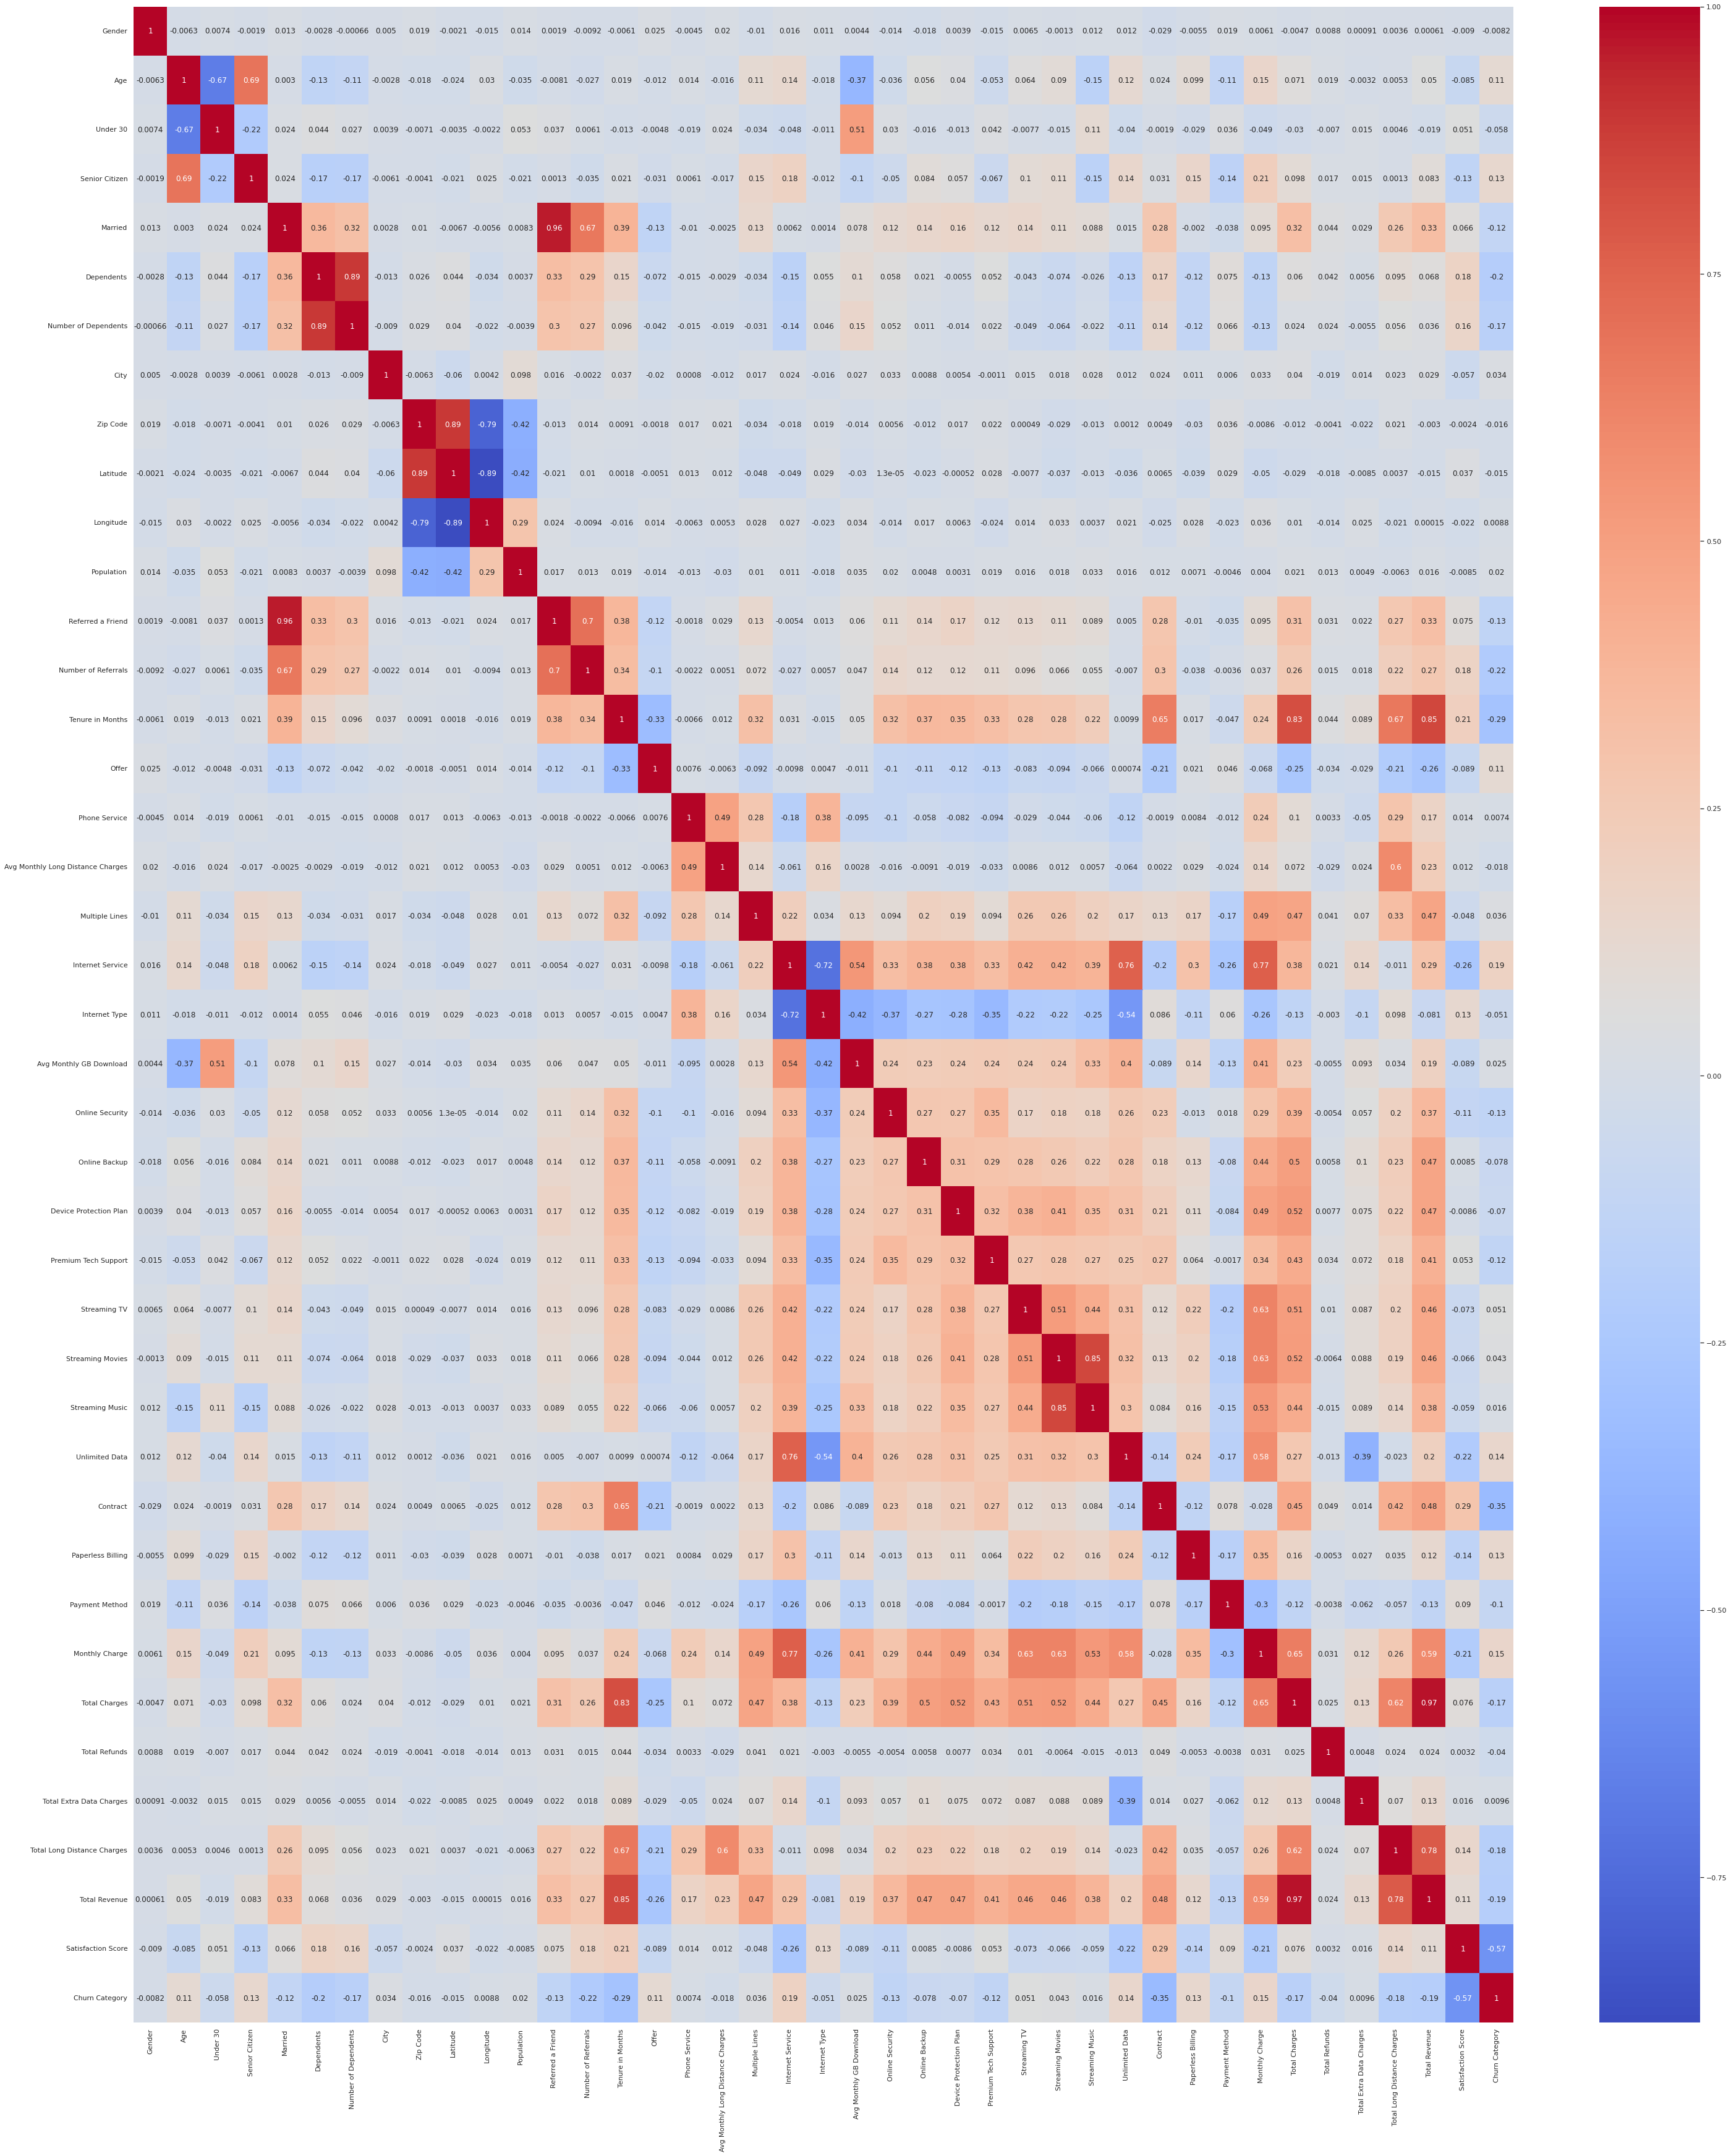

In [10]:
df_no_useless_column_corr = df_no_useless_column.corr()
df_no_useless_column_corr.head()
sns.heatmap(df_no_useless_column_corr , annot= True , cmap = "coolwarm")

In [11]:
def describe_nan(df):
    return pd.DataFrame([(i, df[df[i].isna()].shape[0],df[df[i].isna()].shape[0]/df.shape[0]) for i in df.columns], columns=['column', 'nan_counts', 'nan_rate'])

describe_nan(df)

,column,nan_counts,nan_rate
0,Customer ID,0,0.000000
1,Count,1317,0.233759
2,Gender,1326,0.235357
3,Age,1318,0.233937
4,Under 30,1297,0.230209
5,Senior Citizen,1320,0.234292
6,Married,1317,0.233759
7,Dependents,1329,0.235889
8,Number of Dependents,1316,0.233582
9,Country,686,0.121761


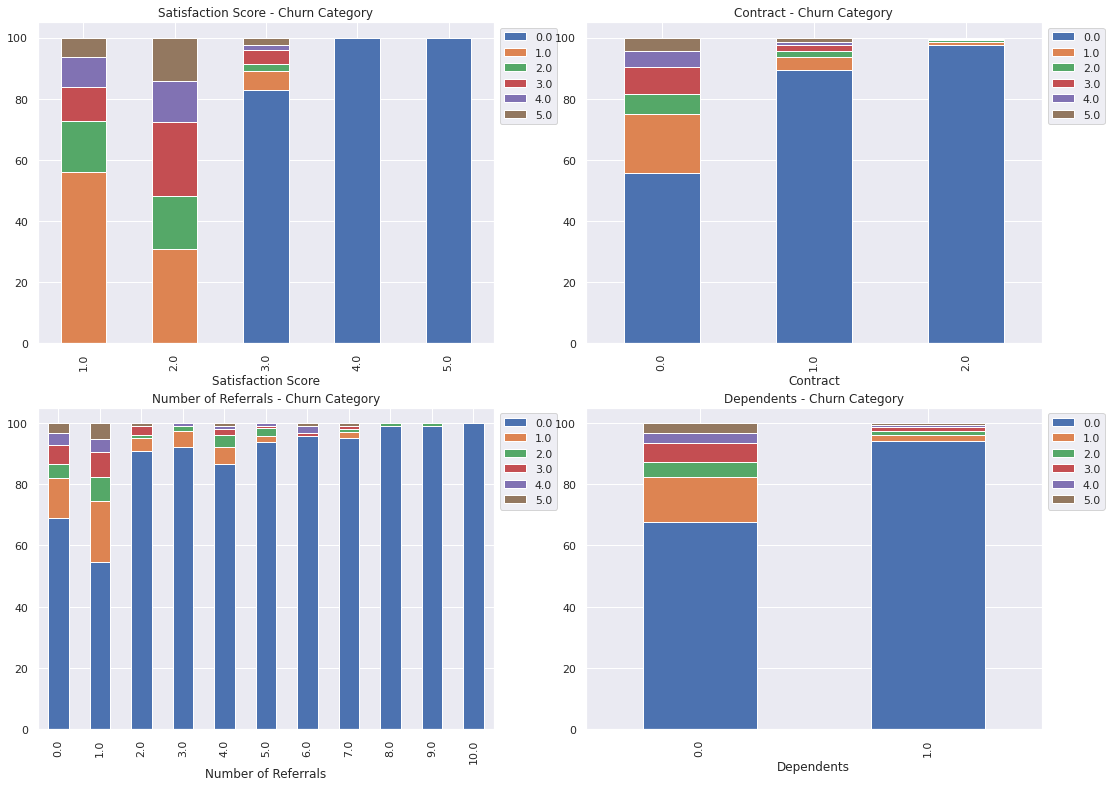

In [38]:
to_plot = ['Satisfaction Score', 'Contract', 'Number of Referrals', 'Dependents']

fig, axes = plt.subplots(nrows=2, ncols=2)

i = 0
for col in to_plot:
      x,y = col, 'Churn Category'
      df_no_useless_column.groupby(x)[y].value_counts(normalize=True,dropna=False).mul(100).unstack().plot.bar(stacked=True,figsize=(18,13),ax=axes[int(i/2),int(i%2)], title = x + " - " + y).legend(bbox_to_anchor=(1.0, 1.0))
      i+=1

# x,y = 'Gender', 'Churn Category'
# train.groupby(x)[y].value_counts(normalize=True,dropna=False).mul(100).unstack().plot.bar(stacked=True,figsize=(6,5), title = col + " to churn cat").legend(bbox_to_anchor=(1.0, 1.0))

plt.show()

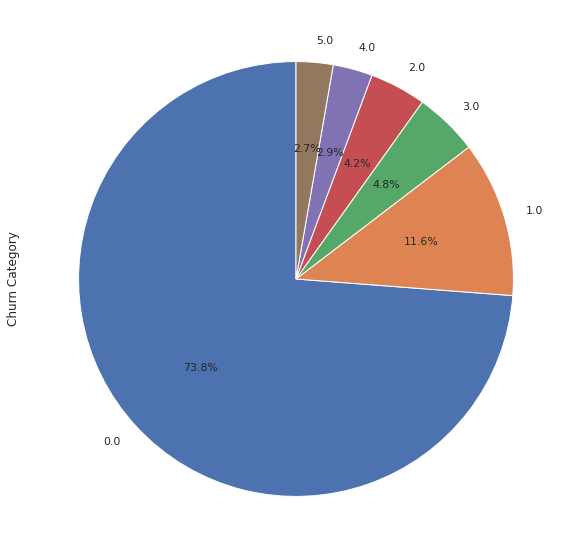

In [54]:
# df_no_useless_column.plot.pie(y = 'Churn Category', figsize=(5, 5))
# df_no_useless_column.value_counts(normalize=True,dropna=False).mul(100).unstack().plot.bar(stacked=True,figsize=(18,13),ax=axes[int(i/2),int(i%2)], title = x + " - " + y).legend(bbox_to_anchor=(1.0, 1.0))
      
df_no_useless_column['Churn Category'].value_counts(normalize=True).plot(kind='pie',figsize=(10,10), autopct='%1.1f%%', 
 startangle=90, shadow=False, legend = False, fontsize=11)


In [12]:
for col in train.columns:
  if(train[col].nunique() == 1):
    print(col +  ":" + str(train[col].nunique()))


NameError: ignored

In [ ]:

for col in train.columns:
  x,y = col, 'Churn Category'
  train.groupby(x)[y].value_counts(normalize=True).mul(100).unstack().plot.bar(stacked=True)

plt.show()

In [ ]:

# set the figure size
plt.figure(figsize=(14, 14))

# from raw value to percentage
for col in train.columns:
      x,y = col, 'Churn Category'
      total = train.groupby(x)[y].sum().reset_index()
      total
      # smoker = train[train.smoker=='Yes'].groupby('day')['total_bill'].sum().reset_index()
      # smoker['total_bill'] = [i / j * 100 for i,j in zip(smoker['total_bill'], total['total_bill'])]
      # total['total_bill'] = [i / j * 100 for i,j in zip(total['total_bill'], total['total_bill'])]

      # # bar chart 1 -> top bars (group of 'smoker=No')
      # bar1 = sns.barplot(x="day",  y="total_bill", data=total, color='darkblue')

      # # bar chart 2 -> bottom bars (group of 'smoker=Yes')
      # bar2 = sns.barplot(x="day", y="total_bill", data=smoker, color='lightblue')

      # # add legend
      # top_bar = mpatches.Patch(color='darkblue', label='smoker = No')
      # bottom_bar = mpatches.Patch(color='lightblue', label='smoker = Yes')
      # plt.legend(handles=[top_bar, bottom_bar])

# show the graph
# plt.show()

In [ ]:
def describe_nan(df):
    return pd.DataFrame([(i, df[df[i].isna()].shape[0],df[df[i].isna()].shape[0]/df.shape[0]) for i in df.columns], columns=['column', 'nan_counts', 'nan_rate'])

describe_nan(train)

In [ ]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(train.isnull())
plt.ylabel('Index')
plt.xlabel('Featuess')
plt.show()

In [ ]:
def describe_nan_row(df):
    return pd.DataFrame([(i, df.loc[[i]].isna().sum().sum(),  df.loc[[i]].isna().sum().sum()/df.shape[1]) for i in df.shape[0]], columns=['ID', 'nan_counts', 'nan_rate'])

nan_rate = describe_nan(train)
ax = nan_rate['nan_rate'].plot(kind='bar', figsize=(14,8), title="nan_rate")
ax.set_xticklabels(nan_rate['column'])
ax.set_xlabel("features")
ax.set_ylabel("nan_rate")
plt.show()

In [ ]:
ax = train_status['Churn Category'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number for each Churn Category (training set)")
ax.set_xlabel("Churn Category")
ax.set_ylabel("Count")
plt.show()


## Covariance
取abs

In [ ]:
# typed_data.drop('Unnamed: 0')
cov_new = train.corr()['Churn Category']
cov_new = cov_new.drop(['Churn Category']).dropna()
cov_new = cov_new.to_frame()
cov_new = cov_new.rename(columns={"Churn Category": "Covariance(abs)"})
cov_new['Covariance(abs)'] = cov_new['Covariance(abs)'].abs()
cov_new = cov_new.sort_values(by=['Covariance(abs)'],ascending=False, na_position='last')
cov_new = cov_new.dropna()
cov_new.head()

In [ ]:
ax = cov_new['Covariance(abs)'].plot(kind='bar',
                                    figsize=(14,8),
                                    title="Covariance")
ax.set_xlabel("features")
ax.set_ylabel("covariance")
plt.show()

In [ ]:

cov_d = train_demographics.replace({'Churn Category': mapping_result}).replace({'Yes': 1, 'No': 0}).corr()['Churn Category']
cov_d = cov_d.drop(['Count','Churn Category'])
cov_l = train_location.replace({'Churn Category': mapping_result}).replace({'Yes': 1, 'No': 0}).corr()['Churn Category']
cov_l = cov_l.drop(['Count','Churn Category'])
cov_se = train_services.replace({'Churn Category': mapping_result}).replace({'Yes': 1, 'No': 0}).corr()['Churn Category']
cov_se = cov_se.drop(['Count','Churn Category'])
cov_sa = train_satisfaction.replace({'Churn Category': mapping_result}).replace({'Yes': 1, 'No': 0}).corr()['Churn Category']
cov_sa = cov_sa.drop(['Churn Category'])



cov = [cov_d, cov_l, cov_se, cov_sa]
cov = pd.concat(cov, join = 'inner',verify_integrity = True)
cov = cov.to_frame()
# cov.columns = ['type','cov']
cov = cov.rename(columns={"Churn Category": "Covariance(abs)"})
cov['Covariance(abs)'] = cov['Covariance(abs)'].abs()
cov = cov.sort_values(by=['Covariance(abs)'],ascending=False, na_position='first')
print(cov.shape)

In [ ]:
ax = cov['Covariance(abs)'].plot(kind='bar',
                                    figsize=(14,8),
                                    title="Covariance")
ax.set_xlabel("features")
ax.set_ylabel("covariance")
plt.show()

Read from folder/data.csv


In [ ]:

typed_data = pd.read_csv('/content/drive/MyDrive/HTML final project/data.csv',index_col=0)
# typed_data.drop('Unnamed: 0')
typed_data = pd.merge(typed_data, train_status, how="inner", on="Customer ID",left_index=False, right_index=False, )
cov_new = typed_data.replace({'Churn Category': mapping_result}).corr()['Churn Category']
cov_new = cov_new.drop(['Churn Category']).dropna()
cov_new = cov_new.to_frame()
cov_new = cov_new.rename(columns={"Churn Category": "Covariance(abs)"})
cov_new['Covariance(abs)'] = cov_new['Covariance(abs)'].abs()
cov_new = cov_new.sort_values(by=['Covariance(abs)'],ascending=False, na_position='last')

cov_new.head()

In [ ]:
typed_data.shape

In [ ]:

ax = cov_new['Covariance(abs)'].plot(kind='bar',
                                    figsize=(14,8),
                                    title="Covariance")
ax.set_xlabel("features")
ax.set_ylabel("covariance")
plt.show()